In [93]:
%matplotlib inline
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#plt.style.use('ggplot')

In [270]:
#foo =r'E:/RESEAERCH/FEEDS/kyebando/kyebandoLonLatDAILY.csv'
foo =r'E:/RESEAERCH/FEEDS/BUGOLBI/train.csv'
#foo = r'E:/RESEAERCH/FEEDS/mulago/train.csv'
#foo = r'E:/RESEAERCH/FEEDS/makerere/MakerereDailyAVE.csv'
#foo =r'E:/RESEAERCH/FEEDS/makidye/train.csv'
#foo =r'E:/RESEAERCH/FEEDS/mulago/mulagoDailyAVE.csv'
#foo = r'E:/RESEAERCH/FEEDS/BUKOTO/BUKOTODailyAVE.csv'
#foo1 = r'E:/RESEAERCH/FEEDS/bukoto/bukotoDailyAVE2.CSV'
#foo1 =r'E:/RESEAERCH/FEEDS/makidye/test.csv'
#foo1 = r'E:/RESEAERCH/FEEDS/makerere/MakerereDailyAVE2.csv'
foo1 = r'E:/RESEAERCH/FEEDS/BUGOLBI/test.csv'
#foo1 = r'E:/RESEAERCH/FEEDS/mulago/test.csv'
#foo = r'E:/RESEAERCH/FEEDS/makidye/makidyeHourlyAVE.csv'

In [271]:
df1 = pd.read_csv(foo, parse_dates =['Date'])
df2 = pd.read_csv(foo1, parse_dates =['Date'])

In [272]:
print df1.head()
print df2.head()


   Day       Date      Value
0    1 2017-12-10  69.018476
1    2 2017-10-13  71.830060
2    3 2017-10-14  51.162671
3    4 2017-10-15  79.535000
4    5 2017-10-16  62.670389
   Day       Date      Value
0  330 2018-05-10  15.696517
1  331 2018-06-10  16.696517
2  332 2018-07-10  27.439631
3  333 2018-08-10  27.457062
4  334 2018-09-10  10.649963


In [273]:
df2.count()

Day      15
Date     15
Value    15
dtype: int64

In [274]:
#df = df.drop(df[df.Value == 500].index)

In [275]:
#convert pandas DataFrame object to numpy array and sort
X = np.asarray(df1['Day'].dropna())
#x = sorted(x)
x1 = np.asarray(df2['Day'].dropna())

In [276]:
y = np.asarray(df1['Value'].dropna())
#y = sorted(y)
y2 = np.asarray(df2['Value'].dropna())

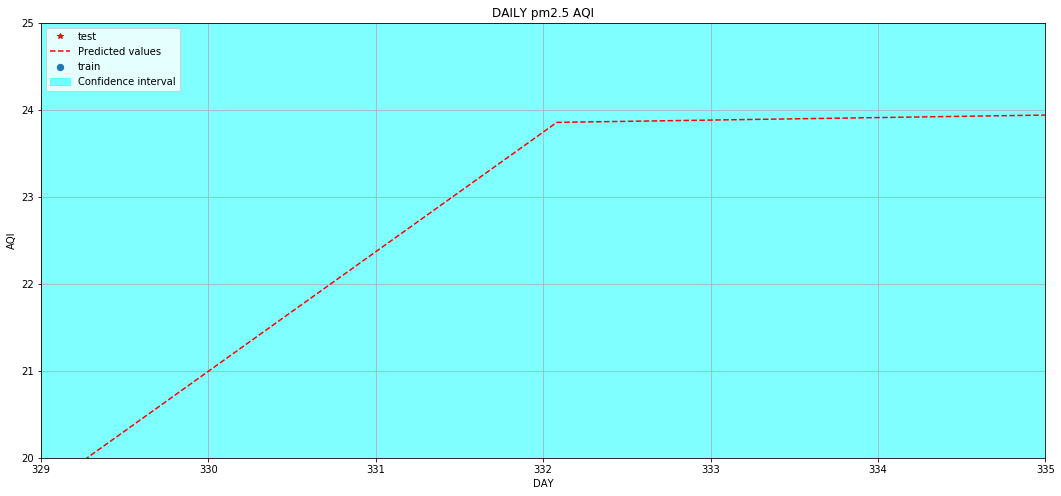

In [282]:
from pykrige import OrdinaryKriging

#X_pred = np.linspace(0, 4, 500)
X_pred = np.linspace(X.min()-1, X.max() + 10, 99)
# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model='gaussian',)

y_pred, y_std = uk.execute('grid', X_pred, np.array([0.]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(18,8))
ax.scatter(X, y, s=40, label='train')
#ax.scatter(x1,y2,s=80,label ='test')
ax.plot(x1,y2,'*', c='r', label='test')
ax.plot(X_pred, y_pred,'--',c='r', label='Predicted values')
ax.fill_between(X_pred, y_pred - 0.2*y_std, y_pred + 0.2*y_std,color='Cyan', alpha=0.5, label='Confidence interval')
ax.legend(loc=2)
plt.grid()
ax.set_xlabel('DAY')
ax.set_ylabel('AQI')
plt.title(r"DAILY pm2.5 AQI")
#plt.xlim(X.min(), X.max())
ax.set_xlim(329,335)
ax.set_ylim(20, 25)
if 'CI' not in os.environ:
    # skip in continous integration
    plt.show()

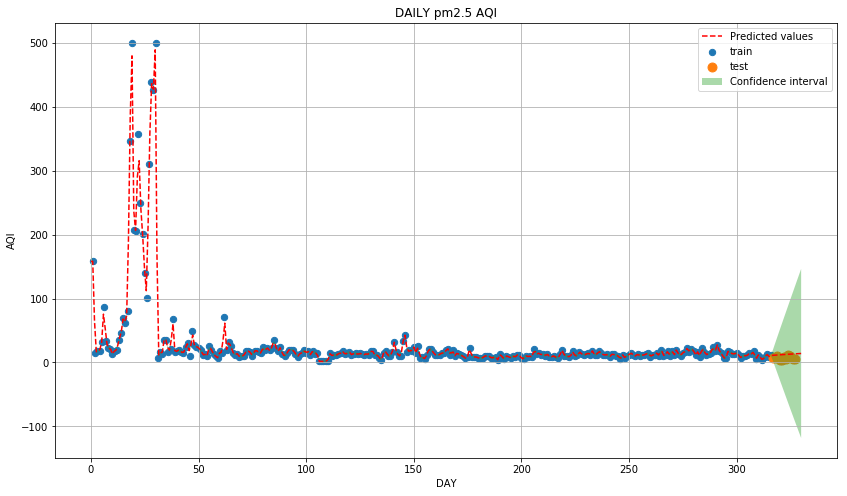

In [118]:
from pykrige import OrdinaryKriging

#X_pred = np.linspace(0, 4, 500)
X_pred = np.linspace(X.min()-1, X.max() + 14, 399)
# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model='spherical',)

y_pred, y_std = uk.execute('grid', X_pred, np.array([0.]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X, y, s=40, label='train')
ax.scatter(x1,y2,s=80,label ='test')


ax.plot(X_pred, y_pred,'--',c='r', label='Predicted values')
ax.fill_between(X_pred, y_pred - 0.1*y_std, y_pred + 0.1*y_std, alpha=0.4, label='Confidence interval')
ax.legend()
plt.grid()
ax.set_xlabel('DAY')
ax.set_ylabel('AQI')
plt.title(r"DAILY pm2.5 AQI")
#plt.xlim(X.min(), X.max())
#ax.s#et_xlim(23.9, 28.44)
#ax.set_ylim(11.5, 12.930)
if 'CI' not in os.environ:
    # skip in continous integration
    plt.show()

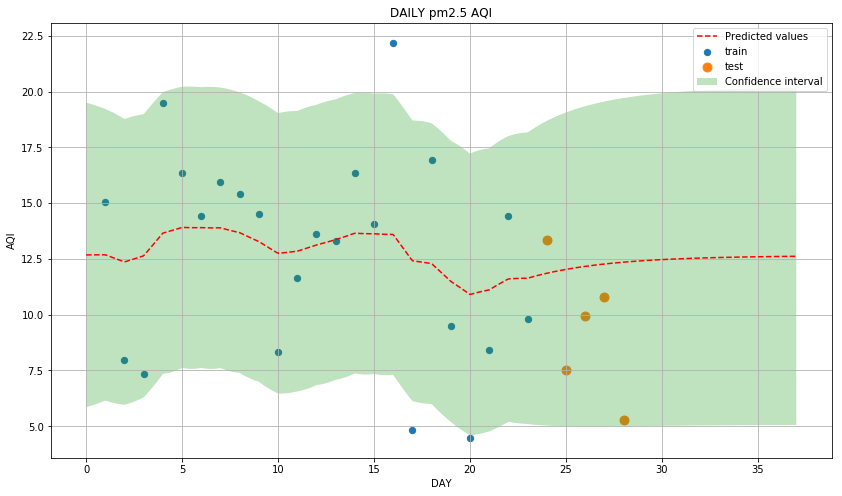

In [62]:
from pykrige import OrdinaryKriging

#X_pred = np.linspace(0, 4, 500)
X_pred = np.linspace(X.min()-1, X.max() + 14, 399)
# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model='exponential',)

y_pred, y_std = uk.execute('grid', X_pred, np.array([0.]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X, y, s=40, label='train')
ax.scatter(x1,y2,s=80, alpha=1,label ='test')


ax.plot(X_pred, y_pred,'--',c='r', label='Predicted values')
ax.fill_between(X_pred, y_pred - 0.3*y_std, y_pred + 0.3*y_std, alpha=0.3, label='Confidence interval')
ax.legend()
plt.grid()
ax.set_xlabel('DAY')
ax.set_ylabel('AQI')
plt.title(r"DAILY pm2.5 AQI")
#plt.xlim(X.min(), X.max())
#ax.set_xlim(23, 27)
#ax.set_ylim(0, 30)
if 'CI' not in os.environ:
    # skip in continous integration
    plt.show()

In [246]:
#Using numpy to read the data
data1 = np.genfromtxt(foo,  delimiter=',', skip_header=1)
#print data1
x1 = data1[:,[0]]
y1 = data1[:,[2]]
#print x
#np.corrcoef(x1, y1)[0, 1]


In [247]:
data1 = np.genfromtxt(foo1,  delimiter=',', skip_header=1)
#print data1
x12 = data1[:,[0]]
y12 = data1[:,[2]]
#print x
#np.corrcoef(x1, y1)[0, 1]

In [248]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata


# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.0361)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(x1, y1)
print '------'
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

------
GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -442850.218


In [267]:
X_ = np.linspace(x1.min()-1, x1.max() + 15, 500)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)
#print y_pred
#print y_std

C:\Users\Wabinyai\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


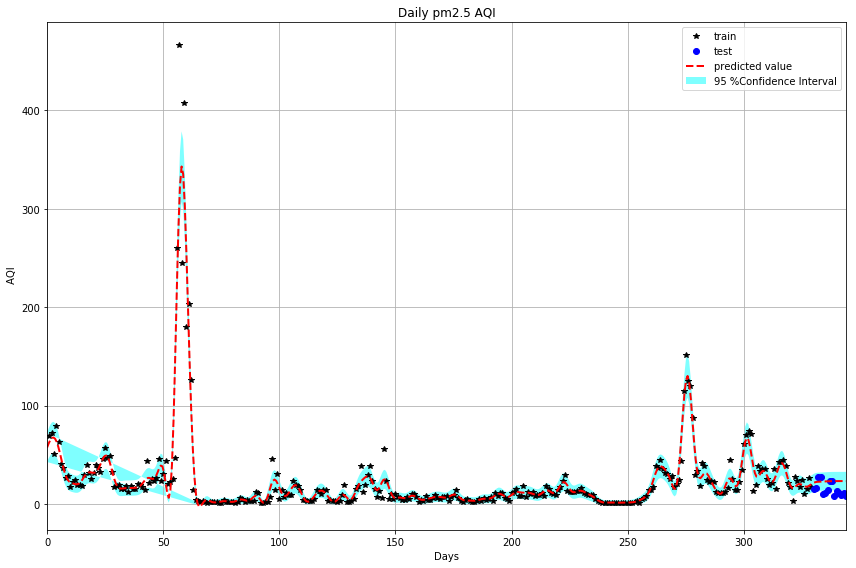

In [269]:
# Illustration
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(x1, y1,'*', c='black',linewidth=7.0, label = 'train')
#plt.scatter(x12,y12,s=80,label ='test')
plt.plot(x12, y12,'o', c='b',  alpha=1.0,label = 'test')
#plt.plot(x12, y12,'*', c='b', label = 'real value')
#plt.plot(X_, y_pred, 'r-', label='prediction value')
plt.plot(X_, y_pred,'--',alpha=1.0,linewidth=2.0, c='r',label='predicted value')
myne="95 %Confidence Interval"
sigma = np.sqrt(y_pred)
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 1.93 * sigma,
                        (y_pred + 1.93 * sigma)[::-1]]),
                         alpha=.5, fc='Cyan', ec='None',label=myne)

plt.xlim(X_.min(), X_.max())
#plt.xlim(329.0, 344.5)
#plt.ylim(0,40.5)

plt.xlabel("Days")
plt.ylabel(r" AQI")
plt.title(r"Daily pm2.5 AQI")
plt.tight_layout()
plt.legend(loc=1)
#plt.legend()
plt.grid()
plt.show()

In [256]:
# Kernel with optimized parameters
k1 = 0.00316**2 * RBF(length_scale=1e+05)  # long term smooth rising trend
k2 = 0.00316**2 * RBF(length_scale=1e+05) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 =11**2 * RationalQuadratic(length_scale=2.08, alpha=1e+05)
k4 = 0.00383**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(300, np.inf))  # noise terms
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(x1, y1)


print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 0.00316**2 * RBF(length_scale=1e+05) + 0.00316**2 * RBF(length_scale=1e+05) * ExpSineSquared(length_scale=1, periodicity=1) + 41.1**2 * RationalQuadratic(alpha=1e+05, length_scale=2.89) + 0.00383**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=304)
Log-marginal-likelihood: -1539.799
